### Import Libraries

In [773]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [774]:
train = pd.read_csv("../house-prices-predictions//train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [775]:
test = pd.read_csv("../house-prices-predictions//test.csv")
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Handle Missig Values

In [776]:
missing_values_df_train = pd.DataFrame(train.isna().sum()).reset_index()
missing_values_df_train.rename(columns={"index" : "Column-Name",0: "Number"},inplace=True)
missing_values_df_train["Percentage"] = np.round((missing_values_df_train["Number"] / len(train)) * 100,1) 
missing_values_df_train[missing_values_df_train["Number"] > 0].sort_values(by="Percentage",ascending=False).head(6)

,Column-Name,Number,Percentage
72,PoolQC,1453,99.5
74,MiscFeature,1406,96.3
6,Alley,1369,93.8
73,Fence,1179,80.8
57,FireplaceQu,690,47.3
3,LotFrontage,259,17.7


In [777]:
missing_values_df_test = pd.DataFrame(test.isna().sum()).reset_index()
missing_values_df_test.rename(columns={"index" : "Column-Name",0: "Number"},inplace=True)
missing_values_df_test["Percentage"] = np.round((missing_values_df_test["Number"] / len(test)) * 100,1) 
missing_values_df_test[missing_values_df_test["Number"] > 0].sort_values(by="Percentage",ascending=False).head(6)

,Column-Name,Number,Percentage
72,PoolQC,1456,99.8
74,MiscFeature,1408,96.5
6,Alley,1352,92.7
73,Fence,1169,80.1
57,FireplaceQu,730,50.0
3,LotFrontage,227,15.6


In [778]:
columns_missing_values_train = missing_values_df_train[missing_values_df_train["Number"] > 0]["Column-Name"].to_list()
columns_missing_values_test = missing_values_df_test[missing_values_df_test["Number"] > 0]["Column-Name"].to_list()
columns_to_remove = missing_values_df_train[missing_values_df_train["Number"] > 0].sort_values(by="Percentage",ascending=False).head(6)["Column-Name"].to_list()

In [779]:
columns_missing_values_train = [i for i in columns_missing_values_train if i not in columns_to_remove]
columns_missing_values_test = [i for i in columns_missing_values_test if i not in columns_to_remove]

### Removing Columns With Lots Of Missing Values

In [780]:
train.drop(columns=columns_to_remove,inplace=True)
test.drop(columns=columns_to_remove, inplace=True)

### Replace Missing Values With mean/median/mode 

In [781]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [782]:
cetegorical_columns = train.select_dtypes(exclude=["number"]).columns.to_list()
numeric_columns = train.select_dtypes(include=["number"]).columns.to_list()
numeric_columns = [i for i in numeric_columns if i != "SalePrice"]

### Storing Mode Of Categorical Columns

In [783]:
mode_train = {}
for col in cetegorical_columns:
    mode_train[col] = train[col].mode()[0]

### Storing Mean of Numberic Values

In [784]:
mean_train = {}
for col in numeric_columns:
    mean_train[col] = train[col].mean()

In [785]:
for col in columns_missing_values_train:
    if col in mode_train:
        train[col].fillna(mode_train[col], inplace=True)
        train[col].fillna(mode_train[col], inplace=True)
    else:
        train[col].fillna(mean_train[col], inplace=True)
        train[col].fillna(mean_train[col], inplace=True)

In [786]:
for col in columns_missing_values_test:
    if col in mode_train:
        test[col].fillna(mode_train[col], inplace = True)
        test[col].fillna(mode_train[col], inplace=True)
    else:
        test[col].fillna(mean_train[col], inplace=True)
        test[col].fillna(mean_train[col], inplace=True)

In [787]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [788]:
test

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


## Outliers

### Train / Test Split

In [789]:
X, y = train.drop(columns=["SalePrice"]) , train["SalePrice"]


In [790]:
X_test =  test.copy()

In [791]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### Label Encoding 

In [792]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cetegorical_columns:
    encoder.fit_transform(X[col])
    X_train[col] = encoder.transform(X_train[col])
    X_val[col] = encoder.transform(X_val[col])
    X_test[col] = encoder.transform(X_test[col])

### Scaling Data

In [793]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [716]:
X_val

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.611378,0.000000,0.75,0.033252,1.0,1.0,1.000000,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.090909,0.00,1.00,0.8
1,0.757368,0.235294,0.75,0.051209,1.0,0.0,1.000000,0.0,0.0,0.0,...,0.058501,0.000000,0.0,0.0,0.0,0.000000,0.272727,1.00,1.00,0.8
2,0.283071,0.058824,1.00,0.035804,1.0,1.0,1.000000,0.0,1.0,0.0,...,0.000000,0.235507,0.0,0.0,0.0,0.000000,0.181818,1.00,1.00,0.8
3,0.357779,0.176471,1.00,0.017294,1.0,1.0,1.000000,0.0,0.0,0.0,...,0.043876,0.065217,0.0,0.0,0.0,0.000000,0.818182,0.00,1.00,0.8
4,0.710075,0.000000,0.75,0.054210,1.0,0.0,0.333333,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.75,1.00,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.226868,0.000000,0.75,0.032139,1.0,1.0,1.000000,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.636364,0.25,1.00,0.8
434,0.221385,0.000000,1.00,0.021127,1.0,1.0,1.000000,0.0,1.0,0.0,...,0.179159,0.000000,0.0,0.0,0.0,0.000000,0.545455,0.00,1.00,0.8
435,0.445511,0.235294,0.25,0.031901,1.0,1.0,1.000000,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.363636,0.50,1.00,0.8
436,0.300891,0.176471,0.75,0.051667,1.0,1.0,1.000000,0.0,0.0,0.0,...,0.084095,0.000000,0.0,0.0,0.0,0.096386,0.636364,0.75,0.50,0.8


### Feature Selection

In [717]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=20)
selected = selector.fit_transform(X_train, y_train)

print("Number of features before selection:", X_train.shape[1])
print("Number of features after selection:", selected.shape[1])

Number of features before selection: 74
Number of features after selection: 74


In [718]:
mask = selector.get_support()  # list of booleans
new_features = []  # The list of your K best features

for bool_val, feature in zip(mask, X_train.columns.to_list()):
    if bool_val:
        new_features.append(feature)

## Comparing Models

In [794]:
models_scores_dict_train = {}
models_scores_dict_val = {}

models_mae_dict_train = {}
models_mae_dict_val = {}

### Linear Regression

In [723]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_transformer = PolynomialFeatures(degree=1)

x_train_trans = poly_transformer.fit_transform(x_train)
x_val_trans = poly_transformer.transform(x_val)
x_test_trans = poly_transformer.transform(x_test)

model = LinearRegression()
model.fit(x_train_trans, y_train)

y_pred_train = model.predict(x_train_trans)
y_pred_val = model.predict(x_val_trans)
y_pred_test = model.predict(x_test_trans)

In [724]:
from sklearn.metrics import r2_score

print("r2_score Train :   ", r2_score(y_train, y_pred_train))
print("r2_score Val :   ", r2_score(y_val, y_pred_val))

models_scores_dict_train["LinearRegression"] = r2_score(y_train, y_pred_train)
models_scores_dict_val["LinearRegression"] = r2_score(y_val, y_pred_val)

r2_score Train :    0.8407248006304398
r2_score Val :    0.8455468254590119


In [725]:
from sklearn.metrics import mean_absolute_error

print("mean_absolute_error Train :   ", mean_absolute_error(y_train, y_pred_train))
print("mean_absolute_error Val :   ", mean_absolute_error(y_val, y_pred_val))

models_mae_dict_train["LinearRegression"] = mean_absolute_error(y_train, y_pred_train)
models_mae_dict_val["LinearRegression"] = mean_absolute_error(y_val, y_pred_val)

mean_absolute_error Train :    18987.734852770303
mean_absolute_error Val :    21922.74035031393


### Support Vector Regressor


In [726]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)

In [727]:
from sklearn.metrics import r2_score

print("r2_score Train :   ", r2_score(y_train, y_pred_train))
print("r2_score Val :   ", r2_score(y_val, y_pred_val))

models_scores_dict_train["SVR"] = r2_score(y_train, y_pred_train)
models_scores_dict_val["SVR"] = r2_score(y_val, y_pred_val)

r2_score Train :    -0.04338219077609673
r2_score Val :    -0.03150366078706246


In [728]:
from sklearn.metrics import mean_absolute_error

print("mean_absolute_error Train :   ", mean_absolute_error(y_train, y_pred_train))
print("mean_absolute_error Val :   ", mean_absolute_error(y_val, y_pred_val))

models_mae_dict_train["SVR"] = mean_absolute_error(y_train, y_pred_train)
models_mae_dict_val["SVR"] = mean_absolute_error(y_val, y_pred_val)

mean_absolute_error Train :    54880.29249368335
mean_absolute_error Val :    57013.58175066724


### XGB Regressor

In [799]:
X = pd.concat([X_train,X_val])
y = pd.concat([y_train, y_val])

In [803]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xg


model = xg.XGBRegressor(
    learning_rate=0.01,
    n_estimators=6000,
    max_depth=4,
    min_child_weight=0,
    gamma=0.6,
    subsample=0.7,
    colsample_bytree=0.7,
    objective="reg:linear",
    nthread=-1,
    scale_pos_weight=1,
    seed=27,
    reg_alpha=0.00006,
    random_state=42,
)

k_folds = KFold(n_splits=5)

scores = cross_val_score(model, X, y, cv=k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

[20:45:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:47:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:47:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

In [795]:
import xgboost as xg

model = xg.XGBRegressor(
    learning_rate=0.01,
    n_estimators=6000,
    max_depth=4,
    min_child_weight=0,
    gamma=0.6,
    subsample=0.7,
    colsample_bytree=0.7,
    objective="reg:linear",
    nthread=-1,
    scale_pos_weight=1,
    seed=27,
    reg_alpha=0.00006,
    random_state=42,
)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

[20:41:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [796]:
from sklearn.metrics import r2_score

print("r2_score Train :   ", r2_score(y_train, y_pred_train))
print("r2_score Val :   ", r2_score(y_val, y_pred_val))

models_scores_dict_train["XGB"] = r2_score(y_train, y_pred_train)
models_scores_dict_val["XGB"] = r2_score(y_val, y_pred_val)

r2_score Train :    0.9997425079345703
r2_score Val :    0.9223453998565674


In [ ]:
from sklearn.ensemble import StackingRegressor

In [797]:
from sklearn.metrics import mean_absolute_error

print("mean_absolute_error Train :   ", mean_absolute_error(y_train, y_pred_train))
print("mean_absolute_error Val :   ", mean_absolute_error(y_val, y_pred_val))

models_mae_dict_train["XGB"] = mean_absolute_error(y_train, y_pred_train)
models_mae_dict_val["XGB"] = mean_absolute_error(y_val, y_pred_val)

mean_absolute_error Train :    951.5306957864482
mean_absolute_error Val :    14617.801343107876


In [798]:
from sklearn.metrics import root_mean_squared_error

print("root_mean_squared_error Train :   ", root_mean_squared_error(np.log(y_train), np.log(y_pred_train)))
print("root_mean_squared_error Train :   ", root_mean_squared_error(np.log(y_val), np.log(y_pred_val)))

root_mean_squared_error Train :    0.008637464937549003
root_mean_squared_error Train :    0.12760103315612933


### K- Neighbors Regressor

In [681]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)

In [682]:
from sklearn.metrics import r2_score

print("r2_score Train :   ", r2_score(y_train, y_pred_train))
print("r2_score Val :   ", r2_score(y_val, y_pred_val))

models_scores_dict_train["KNeighbors"] = r2_score(y_train, y_pred_train)
models_scores_dict_val["KNeighbors"] = r2_score(y_val, y_pred_val)

r2_score Train :    0.802190472250696
r2_score Val :    0.7627905783210399


In [683]:
from sklearn.metrics import mean_absolute_error

print("mean_absolute_error Train :   ", mean_absolute_error(y_train, y_pred_train))
print("mean_absolute_error Val :   ", mean_absolute_error(y_val, y_pred_val))

models_mae_dict_train["KNeighbors"] = mean_absolute_error(y_train, y_pred_train)
models_mae_dict_val["KNeighbors"] = mean_absolute_error(y_val, y_pred_val)

mean_absolute_error Train :    22300.36771037182
mean_absolute_error Val :    25958.770319634703


### Decision Tree Regressor


[Decision Tree Regressor](https://images.app.goo.gl/4dzZRNsxYDsrmXKj7)

In [593]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)

In [594]:
from sklearn.metrics import r2_score

print("r2_score Train :   ", r2_score(y_train, y_pred_train))
print("r2_score Val :   ", r2_score(y_val, y_pred_val))

models_scores_dict_train["DecisionTree"] = r2_score(y_train, y_pred_train)
models_scores_dict_val["DecisionTree"] = r2_score(y_val, y_pred_val)

r2_score Train :    1.0
r2_score Val :    0.7376229785619777


In [595]:
from sklearn.metrics import mean_absolute_error

print("mean_absolute_error Train :   ", mean_absolute_error(y_train, y_pred_train))
print("mean_absolute_error Val :   ", mean_absolute_error(y_val, y_pred_val))

models_mae_dict_train["DecisionTree"] = mean_absolute_error(y_train, y_pred_train)
models_mae_dict_val["DecisionTree"] = mean_absolute_error(y_val, y_pred_val)

mean_absolute_error Train :    0.0
mean_absolute_error Val :    27354.146118721463


### Ridge Model

In [596]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

model = Ridge()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)

In [597]:
from sklearn.metrics import r2_score

print("r2_score Train :   ", r2_score(y_train, y_pred_train))
print("r2_score Val :   ", r2_score(y_val, y_pred_val))

r2_score Train :    0.8326261361566129
r2_score Val :    0.8386305807840099


In [598]:
from sklearn.metrics import mean_absolute_error

print("mean_absolute_error Train :   ", mean_absolute_error(y_train, y_pred_train))
print("mean_absolute_error Val :   ", mean_absolute_error(y_val, y_pred_val))

mean_absolute_error Train :    19744.98311648735
mean_absolute_error Val :    22280.934518716473


### _Random Forest Reggressor_

In [746]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)

In [747]:
from sklearn.metrics import r2_score

print("r2_score Train :   ", r2_score(y_train, y_pred_train))
print("r2_score Val :   ", r2_score(y_val, y_pred_val))

r2_score Train :    0.9778352967408024
r2_score Val :    0.8904234708993726


In [748]:
from sklearn.metrics import mean_absolute_error

print("mean_absolute_error Train :   ", mean_absolute_error(y_train, y_pred_train))
print("mean_absolute_error Val :   ", mean_absolute_error(y_val, y_pred_val))

mean_absolute_error Train :    6804.6589530332685
mean_absolute_error Val :    17311.1551369863


### **_Plot the Results_**

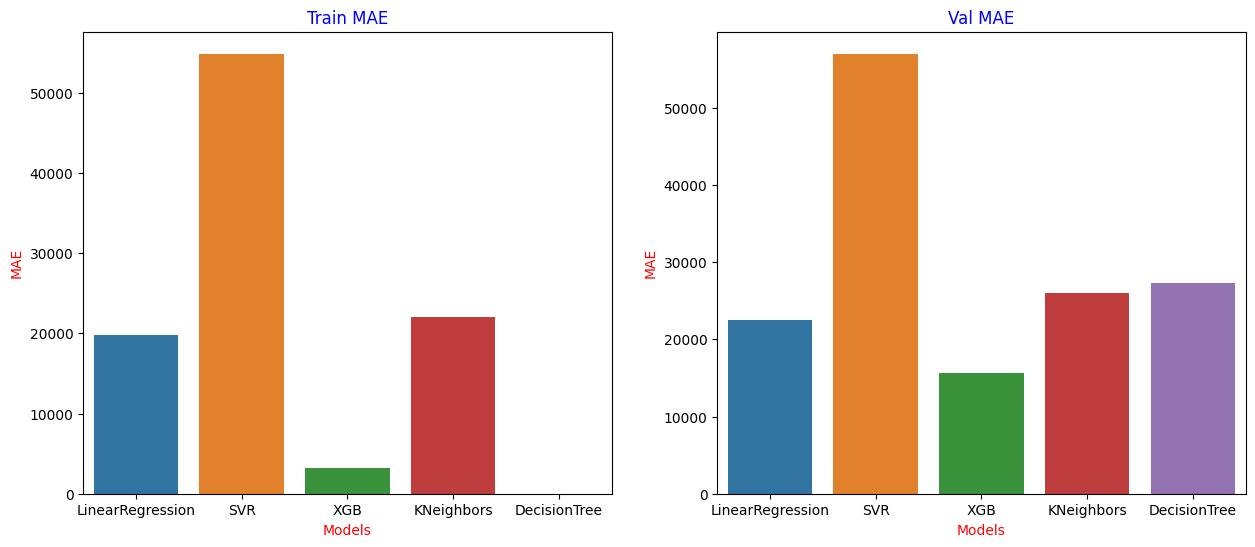

In [599]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

keys_train = list(models_mae_dict_train.keys())
vals_train = [float(models_mae_dict_train[k]) for k in keys_train]
sns.barplot(x=keys_train, y=vals_train, ax=ax[0])
ax[0].set_xlabel("Models", c="red")
ax[0].set_ylabel("MAE", c="red")
ax[0].set_title("Train MAE", c="blue")

keys_test = list(models_mae_dict_val.keys())
vals_test = [float(models_mae_dict_val[k]) for k in keys_test]
sns.barplot(x=keys_test, y=vals_test, ax=ax[1])
ax[1].set_xlabel("Models", c="red")
ax[1].set_ylabel("MAE", c="red")
ax[1].set_title("Val MAE", c="blue");

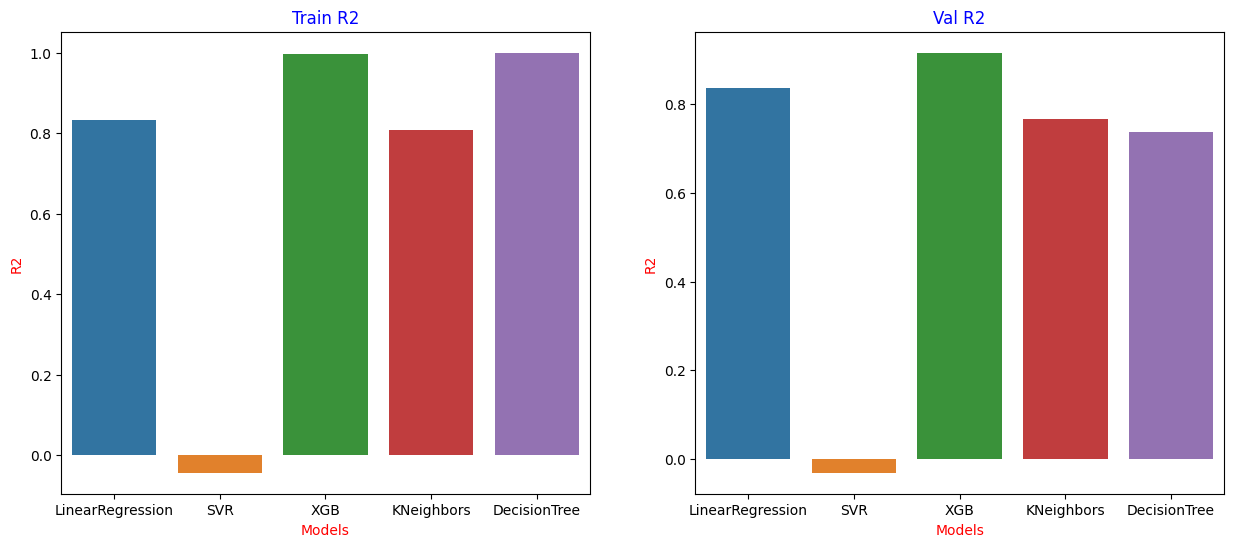

In [600]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

keys_train = list(models_scores_dict_train.keys())
vals_train = [float(models_scores_dict_train[k]) for k in keys_train]
sns.barplot(x=keys_train, y=vals_train, ax=ax[0])
ax[0].set_xlabel("Models", c="red")
ax[0].set_ylabel("R2", c="red")
ax[0].set_title("Train R2", c="blue")

keys_test = list(models_scores_dict_val.keys())
vals_test = [float(models_scores_dict_val[k]) for k in keys_test]
sns.barplot(x=keys_test, y=vals_test, ax=ax[1])
ax[1].set_xlabel("Models", c="red")
ax[1].set_ylabel("R2", c="red")
ax[1].set_title("Val R2", c="blue");

In [749]:
y_pred_test = pd.DataFrame(y_pred_test,columns=["SalePrice"])

In [750]:
submission = pd.DataFrame(pd.concat([test["Id"],y_pred_test],axis = 1))
submission

,Id,SalePrice
0,1461,134591.50
1,1462,156051.00
2,1463,197322.37
3,1464,207941.60
4,1465,219435.45
...,...,...
1454,2915,95641.00
1455,2916,98665.04
1456,2917,154991.05
1457,2918,125722.62


In [751]:
submission.to_csv("submission.csv",index=False)

In [804]:
## Ensemble Models
### Average
# Import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xg

xgb = xg.XGBRegressor(
    learning_rate=0.01,
    n_estimators=6000,
    max_depth=4,
    min_child_weight=0,
    gamma=0.6,
    subsample=0.7,
    colsample_bytree=0.7,
    objective="reg:linear",
    nthread=-1,
    scale_pos_weight=1,
    seed=27,
    reg_alpha=0.00006,
    random_state=42,
)
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=5)

# Create average ensemble
avg = VotingRegressor(estimators=[("dt", dt), ("knn", knn), ("xgb", xgb)])

# Fit ensemble on data
avg.fit(X_train, y_train)

# Make predictions
y_pred_train = avg.predict(X_train)
y_pred_val = avg.predict(X_val)

# Evaluate performance
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"MAE Train : {mae_train:.2f}")

r2_score_train = r2_score(y_train, y_pred_train)
print(f"R2_Score Train : {r2_score_train:.2f}")


mae_val = mean_absolute_error(y_val, y_pred_val)
print(f"MAE Val : {mae_val:.2f}")

r2_score_val = r2_score(y_val, y_pred_val)
print(f"R2_Score Val : {r2_score_val:.2f}")

[00:50:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAE Train : 6466.86
R2_Score Train : 0.98
MAE Val : 17761.02
R2_Score Val : 0.88


In [807]:
from sklearn.ensemble import StackingRegressor


# Define models
xgb = xg.XGBRegressor(
    learning_rate=0.01,
    n_estimators=6000,
    max_depth=4,
    min_child_weight=0,
    gamma=0.6,
    subsample=0.7,
    colsample_bytree=0.7,
    objective="reg:linear",
    nthread=-1,
    scale_pos_weight=1,
    seed=27,
    reg_alpha=0.00006,
    random_state=42,
)
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=5)


# Create a stacking ensemble
stack = StackingRegressor(
    estimators=[("dt", dt), ("knn", knn), ("xgb", xgb)],
    final_estimator=xg.XGBRegressor(
        learning_rate=0.01,
        n_estimators=6000,
        max_depth=4,
        min_child_weight=0,
        gamma=0.6,
        subsample=0.7,
        colsample_bytree=0.7,
        objective="reg:linear",
        nthread=-1,
        scale_pos_weight=1,
        seed=27,
        reg_alpha=0.00006,
        random_state=42,
    ),
)

# Fit ensemble on data
stack.fit(X_train, y_train)

# Make predictions
y_pred_train = stack.predict(X_train)
y_pred_val = stack.predict(X_val)

# Evaluate performance
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"MAE Train : {mae_train:.2f}")

r2_score_train = r2_score(y_train, y_pred_train)
print(f"R2_Score Train : {r2_score_train:.2f}")


mae_val = mean_absolute_error(y_val, y_pred_val)
print(f"MAE Val : {mae_val:.2f}")

r2_score_val = r2_score(y_val, y_pred_val)
print(f"R2_Score Val : {r2_score_val:.2f}")

[00:59:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:00:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:00:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal